In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
import scipy.stats as stats
import math

#import pdb; pdb.set_trace() #use this to debug in jupyter

In [2]:
def CompareDR2Numpy(drSamples, numpySamples):
    p1Data = [(np.mean(drSamples), np.var(drSamples)), (np.mean(numpySamples), np.var(numpySamples))]
    p1Res = pd.DataFrame(p1Data, columns=['Mean','Variance'], index = ['DR Sample','Numpy Sample'])
    print(p1Res)
    
    plt.subplot(1,2,1)
    plt.hist(drSamples, density = True, bins = 20)
    plt.title('DR Code')
    plt.subplot(1,2,2)
    plt.hist(numpySamples, density = True, bins = 20)
    plt.title('NumpyCode')
    plt.show()

Mean  Variance
DR Sample     0.493869  0.250748
Numpy Sample  0.503415  0.255542
Imperical     0.500000  0.250000


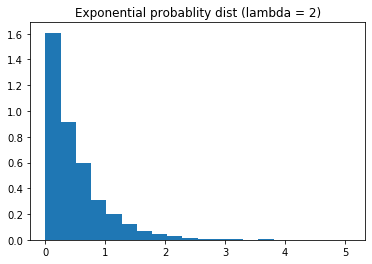

In [3]:
#HW 2: Problem 1.
def GetExpRndSample(l, nSamples, maxD = 1): #cdf = 1 - exp(-lambda*x)
    uniform = np.random.uniform(0, maxD, nSamples)
    return -np.log(1-uniform) / l

lam = 2
numSamples = 10000
expSample = GetExpRndSample(lam, numSamples)
numpySample = np.random.exponential(scale = 1/lam, size = numSamples)

p1Data = [(np.mean(expSample), np.var(expSample)), (np.mean(numpySample), np.var(numpySample)), (1/lam,1/lam**2)]
p1Res = pd.DataFrame(p1Data, columns=['Mean','Variance'], index = ['DR Sample','Numpy Sample','Imperical'])

print(p1Res)
plt.hist(expSample, density = True, bins = 20)
plt.title('Exponential probablity dist (lambda = ' + str(lam) + ')')
plt.show()
plt.hist(expSample, density = True, cumulative = True, bins = 20)
plt.title('Exponential cumulative dist (lambda = ' + str(lam) + ')')
plt.show()

Mean  Variance
DR Sample     0.000268  1.001995
Numpy Sample  0.000249  1.002277


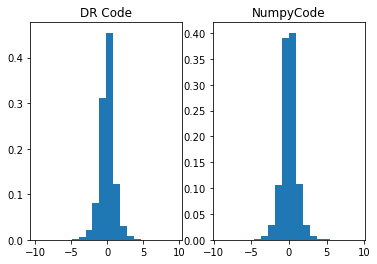

In [4]:
def GetDoubleExpRndSample(l, nSamples): #cdf = 1 - exp(-lambda*abs(x))
    l = 1/l
    uniform = np.random.uniform(-1, 1, nSamples)
    sign = uniform / np.abs(uniform)
    return -np.log(1-np.abs(uniform)) / l * sign


lam = 1/2**0.5
numSamples = 1000000
dblExpSample = GetDoubleExpRndSample(lam, numSamples)
numpySample = np.random.laplace(scale = lam, size = numSamples)
CompareDR2Numpy(dblExpSample, numpySample)

In [5]:
#HW 2: Problem 2
def GenRandSample(m, desiredPdf, drawPdf, xDraws, displayGraphs = False):
    yUniform = np.random.uniform(0, 1, xDraws.size)
    xSub = desiredPdf(xDraws) / (m * drawPdf(xDraws))
    xRes = xDraws[yUniform < xSub]

    if(displayGraphs):
        plt.subplot(1,2,1)
        plt.scatter(xDraws, yUniform)
        x = np.linspace(np.min(xRes)-1,np.max(xRes)+1,10000)
        plt.plot(x, desiredPdf(x), color = 'red')
        plt.title('Starting draws')
        plt.subplot(1,2,2)
        plt.hist(xRes, density = True, bins = 30)
        x = np.linspace(np.min(xRes)-1,np.max(xRes)+1,10000)
        plt.plot(x, desiredPdf(x), color = 'red')
        plt.title('Histogram of result')
        plt.show()
    return xRes

startingSampleSize = 10000
expSample = GetDoubleExpRndSample(1/2**0.5, startingSampleSize) #variance = 1 @ lambda = 1/sqrt(2)
doubleExpPdf = lambda x: 2**0.5/2 * np.exp(-np.absolute(x) * 2**0.5)
p2Sample = GenRandSample(2, norm.pdf, doubleExpPdf, expSample, True)
print('Sample Mean: ' + str(np.mean(p2Sample)))
print('Sample Variance: ' + str(np.var(p2Sample)))
print('Sample Size: ' + str(p2Sample.size))

Sample Mean: 0.005328377816726584
Sample Variance: 1.002801095425654
Sample Size: 5073


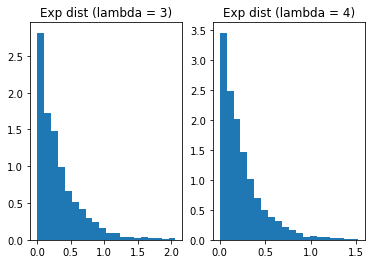

Eq 1 w/ (alpha = 3): 0.32562155999667286
Eq 1 w/ (alpha = 4): 0.24409798068448613
Eq 2 w/ (alpha = 3): -1.689716416313411
Eq 2 w/ (alpha = 4): -1.975879587289219


In [6]:
#HW2 - Problem 3
xDrawsP3_3 = GetExpRndSample(3, 1000)
xDrawsP3_4 = GetExpRndSample(4, 1000)
plt.subplot(1,2,1)
plt.hist(xDrawsP3_3, density = True, bins = 20)
plt.title('Exp dist (lambda = 3)')
plt.subplot(1,2,2)
plt.hist(xDrawsP3_4, density = True, bins = 20)
plt.title('Exp dist (lambda = 4)')
plt.show()

print('Eq 1 w/ (alpha = 3): ' + str(np.mean(xDrawsP3_3)))
print('Eq 1 w/ (alpha = 4): ' + str(np.mean(xDrawsP3_4)))
print('Eq 2 w/ (alpha = 3): ' + str(np.mean(np.log(xDrawsP3_3))))
print('Eq 2 w/ (alpha = 4): ' + str(np.mean(np.log(xDrawsP3_4))))

In [7]:
#HW2 - Problem 4
def GetPoissRndSample(l, nSamples):
    res = np.empty(nSamples)
    s = 0
    while(s < nSamples):
        exp = np.cumsum(np.random.exponential(scale = 1/l, size = math.ceil(l*l)))
        poiss = exp[exp<1].size
        if(exp[-1] < 1):
            #import pdb; pdb.set_trace()
            poiss = GetPoissRndSampleIter(l, exp[-1], poiss)
        res[s] = poiss
        s += 1
        #import pdb; pdb.set_trace()
    return res

def GetPoissRndSampleIter(l, sum = 0, count = 0):
    while (sum < 1):
        expVal = np.random.exponential(scale = 1/l, size = 1)[0]
        sum += expVal
        count+= 1
    return count - 1


poissonTest = GetPoissRndSample(1.5, 10000)
CompareDR2Numpy(poissonTest, np.random.poisson(lam = 1.5, size = 10000))

p4Sample = GetPoissRndSample(1.5, 10000)
p4Res = np.sum(p4Sample[p4Sample > 2]) / np.sum(p4Sample)
print('P(X>2) = ' + str(p4Res))

Mean  Variance
DR Sample     1.5099  1.486102
Numpy Sample  1.4995  1.489000


P(X>2) = 0.4416192706590833


Mean  Variance
DR Sample     2.002159  0.992288
Numpy Sample  2.002223  0.997799


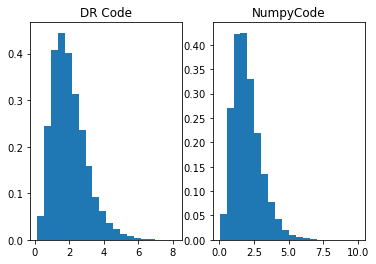

Integral value estimate (sum exp) = 1.8753482956035754


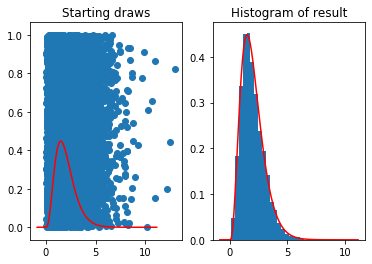

Mean  Variance
DR Sample     1.995480  1.024178
Numpy Sample  2.006131  1.027609


Integral value estimate (acceptReject) = 1.8772944399780438


In [8]:
#HW2 - Problem 5
def GetGammaRndSample(alpha, lam, nSamples):
    expMatrix = np.random.exponential(scale = 1/lam, size = (nSamples, alpha))
    return np.sum(expMatrix, axis = 1)

gammaTest = GetGammaRndSample(4,2,10000)
#shape = alpha | scale = 1/beta
CompareDR2Numpy(gammaTest, np.random.gamma(shape = 4, scale = 1/2, size = 100000))

h_x = lambda x: math.gamma(4)/2**4*x**2
print('Integral value estimate (sum exp) = ' + str(np.mean(h_x(gammaTest))))

n = 10000
instrumentalDensity = GetGammaRndSample(2,1,n)
gammaPdf = lambda x: stats.gamma.pdf(x, a=4, scale=1/2)
gammaiPdf = lambda x: stats.gamma.pdf(x, a=2, scale=1)
gammaViaARMethod = GenRandSample(2, gammaPdf, gammaiPdf, instrumentalDensity, True)
CompareDR2Numpy(gammaViaARMethod, np.random.gamma(shape = 4, scale = 1/2, size = n))

print('Integral value estimate (acceptReject) = ' + str(np.mean(h_x(gammaViaARMethod))))


In [9]:
def ParamsSamples(matrix, calcMean = True):
    sampleMeans = np.mean(matrix, axis = 0)
    if(calcMean):
        return np.mean(sampleMeans)
    else:
        return np.var(sampleMeans)

uniform = np.random.uniform(0, 1, (100,100))
print('Baseline Mean and Variance of E[X^2], X ~ Uniform(0,1)')
print('Mean: ' + str(ParamsSamples(uniform ** 2)))
print('Var:  ' + str(ParamsSamples(uniform ** 2, False)))

Baseline Mean and Variance of E[X^2], X ~ Uniform(0,1)
Mean: 0.32938554423021393
Var:  0.0010023137739898034


In [10]:
#HW2 - Problem 6
print('Variance Reduction Method: Antithetic')
uniformAntithetic = np.concatenate((uniform, 1-uniform))
print('Mean Antithetic: ' + str(ParamsSamples(uniformAntithetic ** 2)))
print('Var Antithetic:  ' + str(ParamsSamples(uniformAntithetic ** 2, False)))

Variance Reduction Method: Antithetic
Mean Antithetic: 0.33257111908103626
Var Antithetic:  6.298693525062636e-05


In [11]:
#HW2 - Problem 7
print('Variance Reduction Method: Control Variates')
cvAdjust = uniform ** 2 - uniform
print('Mean CV: ' + str(ParamsSamples(cvAdjust) + 0.5)) # E[X] = 0.5
print('Var CV:  ' + str(ParamsSamples(cvAdjust, False)))

Variance Reduction Method: Control Variates
Mean CV: 0.3325711190810362
Var CV:  6.298693525062644e-05


In [12]:
#HW2 - Problem 8
print('Variance Reduction Method: Stratefied Sampling')
u1 = np.random.uniform(0, 1/5, (100,20)) **2
u2 = np.random.uniform(1/5, 2/5, (100,20)) ** 2
u3 = np.random.uniform(2/5, 3/5, (100,20)) ** 2
u4 = np.random.uniform(3/5, 4/5, (100,20)) ** 2
u5 = np.random.uniform(4/5, 1, (100,20)) ** 2
uniformStrat = (np.mean(u1, axis = 1)+ np.mean(u2, axis = 1)+np.mean(u3, axis = 1)+np.mean(u4, axis = 1)+np.mean(u5, axis = 1))*0.2

print('Mean Strat: ' + str(np.mean(uniformStrat)))
print('Var Strat:  ' + str(np.var(uniformStrat)))

Variance Reduction Method: Stratefied Sampling
Mean Strat: 0.33420688193751874
Var Strat:  4.087090465216768e-05
